# DNS Data Analysis

 We analyzed DNS data from the **'dns_2019_08.pcap'** file spanning a **two-week** period, from August 1st to August 14th, as provided in the paper [1].

1. We have created a **network graph** (as below) in which each cluster represents a device, and the small red dots represent domain names. A line connects a domain name to a device if that device has queried the domain. The intensity of the line indicates the frequency with which the domain name was queried by the device. The  **interactive network graph** can be viewed in this link https://almihan.github.io/InteractiveNetworkGraph/

>  **Insight of the network graph:**  The  DNS queries issued by different IoT devices appear to be quite unique. Since IoT devices are custom-designed for specific tasks, they tend to access a **limited number of domains$^{*1}$**(see Note below), primarily corresponding to their vendor-specific endpoint servers.

>  In the network graph, it shows some devices **share the same domains**, which makes it challenging to distinguish between them[1][2]. In many cases, this overlap is because the devices come from the same vendor. 

>  **Discussion:** <font color='red'>How important is it to distinguish between different devices from the same vendor, such as the various devices offered by Belkin? Is it crucial to differentiate them?</font> 

>  I'll argue that it is worthwhile to do so. Firstly, not all products from the same vendor are equally supported. The rapid increase of IoT devices frequently results in older, unsupported devices continuing to operate. When manufacturers abandon these older devices, they become increasingly vulnerable to cyber threats.

>  Secondly, vulnerabilities can be device-specific, affecting only certain models. For instance, a recent security issue detected in the WeMo Smart Plug Mini V2 [4] was not reported in other WeMo products such as the WeMo Switch, Wemo Link, or Wemo Motion Sensor. Since WeMo chose not to issue updates for this "end-of-life" product, users must take immediate action to protect themselves.

>  If consumers are unaware of such specific vulnerabilities, ISPs may come in to role. They can map the locations of specific IoT devices within their network and guide hosting clients in securing those devices, particularly when new vulnerabilities are discovered.

>  Therefore, improving the ability to distinguish devices from the same vendor is essential. It would benefit ISPs by enhancing their network security measures and enabling targeted customer support. Consumers would also benefit from more granular information about the security status of their devices.

>  **Note** *1. The paper [2] conducted a convergence analysis to determine whether the number of FQDNs remains stable or continues to grow over our observation period. The findings indicate that IoT systems typically communicate with a consistent set of hosts and domains on the Internet.

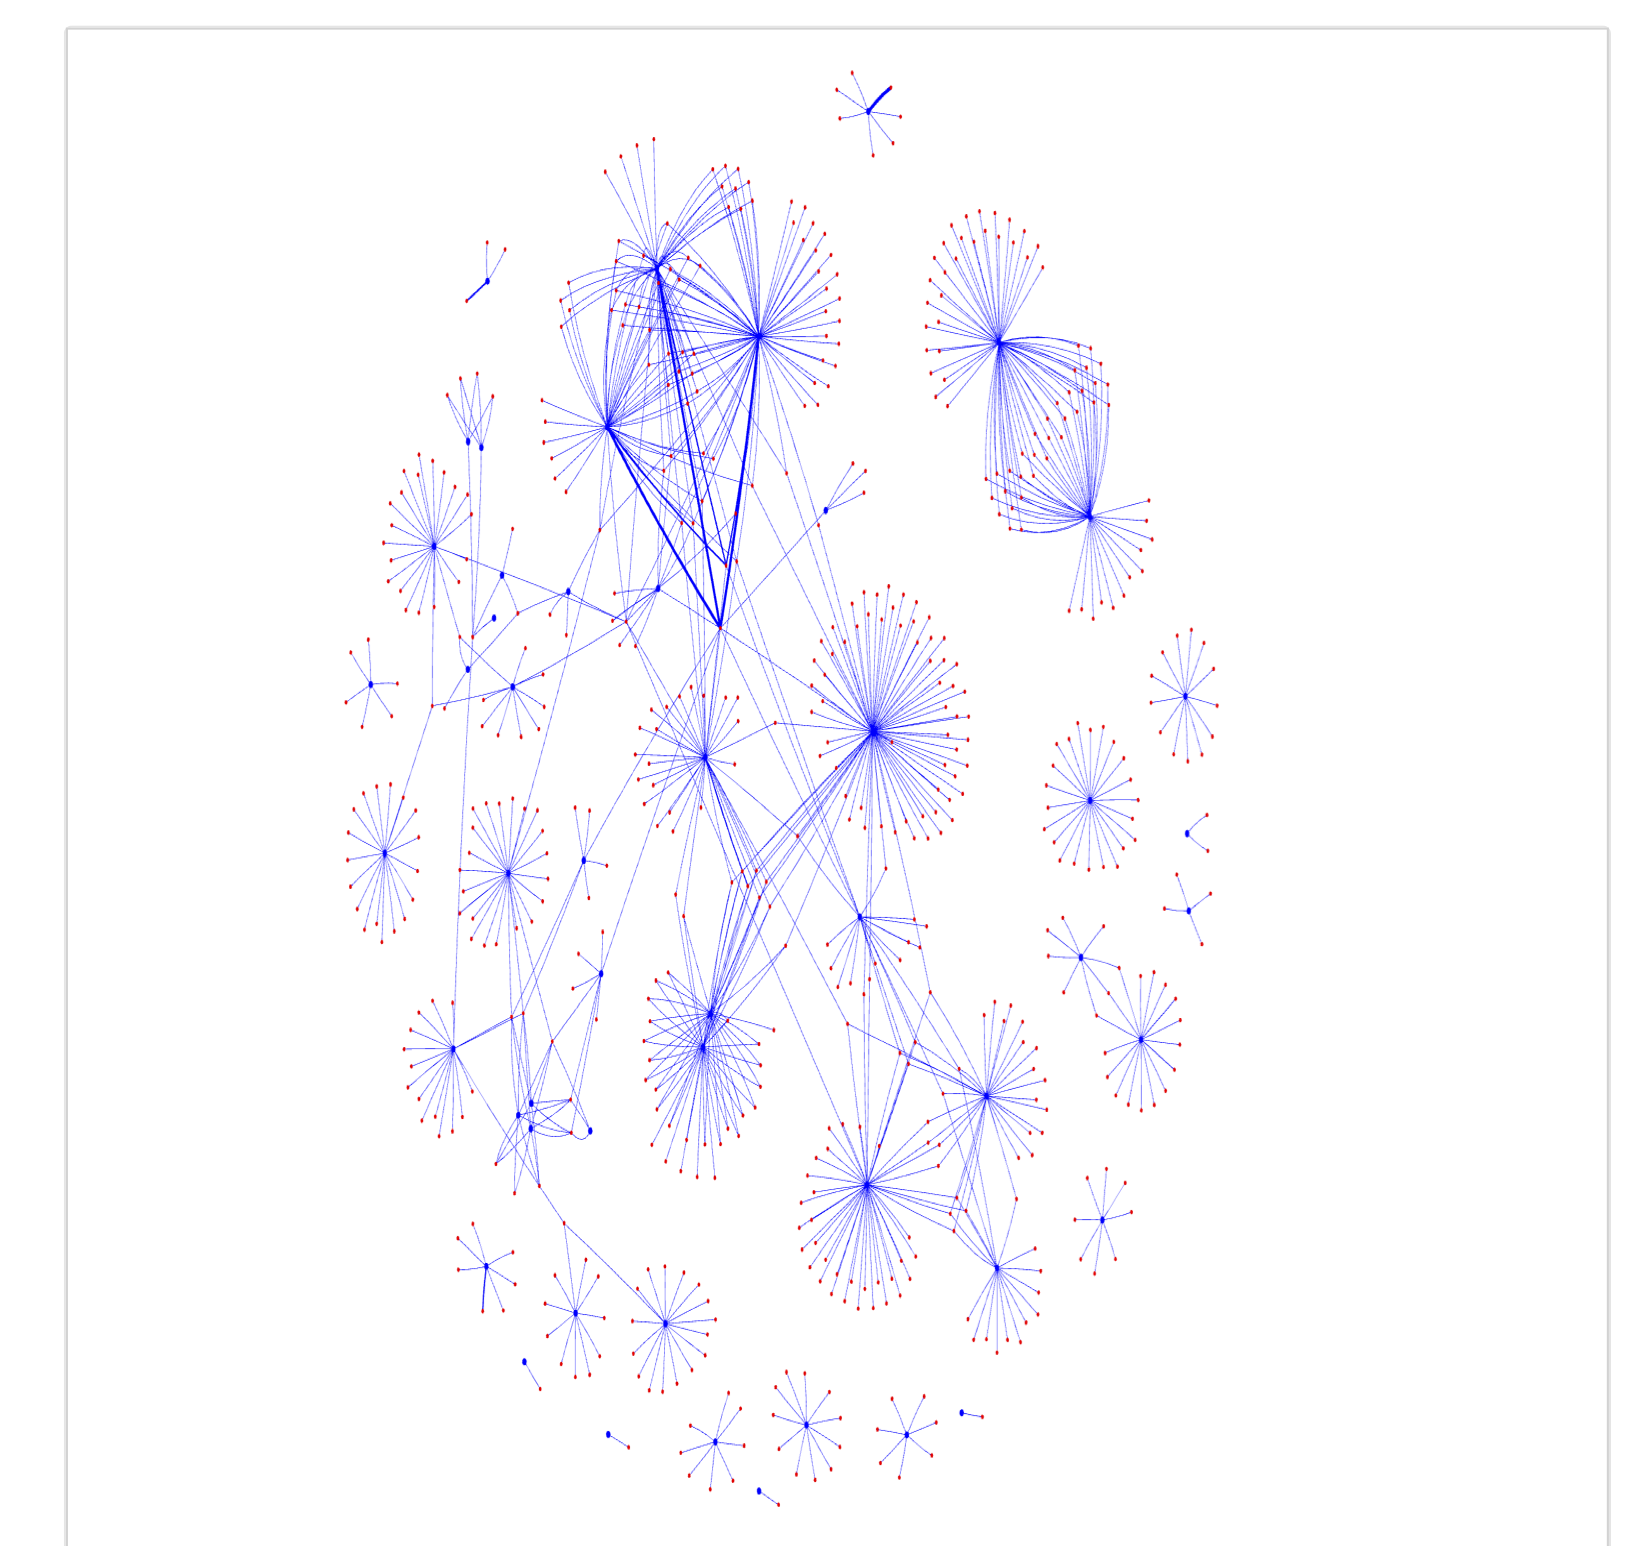

In [4]:
from IPython.display import Image
Image(filename="./net_work.png")

2. We gathered statistics on fully connected domain names(**FCDN**) and second level domain names(**SLD**), inlcuding their **frequencies** and the **number of unique FCDNs and SLDs** queried by each IoT device over the two-week period. The results are displayed in the **bar graph below**, and **detail information** can be found in the **google sheets** provided in this link https://docs.google.com/spreadsheets/d/1gjpL_dqCNg286BEemUFXEigc27a7SN2Y_ggjPxS2NuE/edit?usp=sharing

>  **Insight of the statistics:** With these statistics, we can identify the domain names of all servers that IoT devices consistently and uniquely communicate with. 

>  Such statistics can also serve as a valuable feature for distinguishing between IoT and non-IoT devices when it comes to  identify IoT devices that are hosted behind some middleboxes, such as NATs. In paper [2], a vast number of unique domains were observed for non-IoT devices reaching up to 12,000. This diversity is in stark contrast to IoT devices; our graph indicates a maximum of 78 unique domain names for an individual IoT device. 

**Discussion:** <font color='red'>In paper [1], the authors chose a one-hour time window to present DNS query patterns, but a longer time period might result in the loss of important information. Why did they opt for this specific time frame? </font>

> In paper [1], the authors selected a one-hour time window for analyzing DNS query patterns, taking DNS caching into account. Subsequent requests for the same domain within the Time to Live (TTL) duration will utilize the cached record, meaning the device won't send a new DNS query over the network for that specific domain. Tools like Wireshark would not capture these queries during the TTL period. After analyzing the distribution of TTLs for domain names queried by IoT devices, they found that the vast majority had a TTL below 3600 seconds. Therefore, they chose a one-hour window.


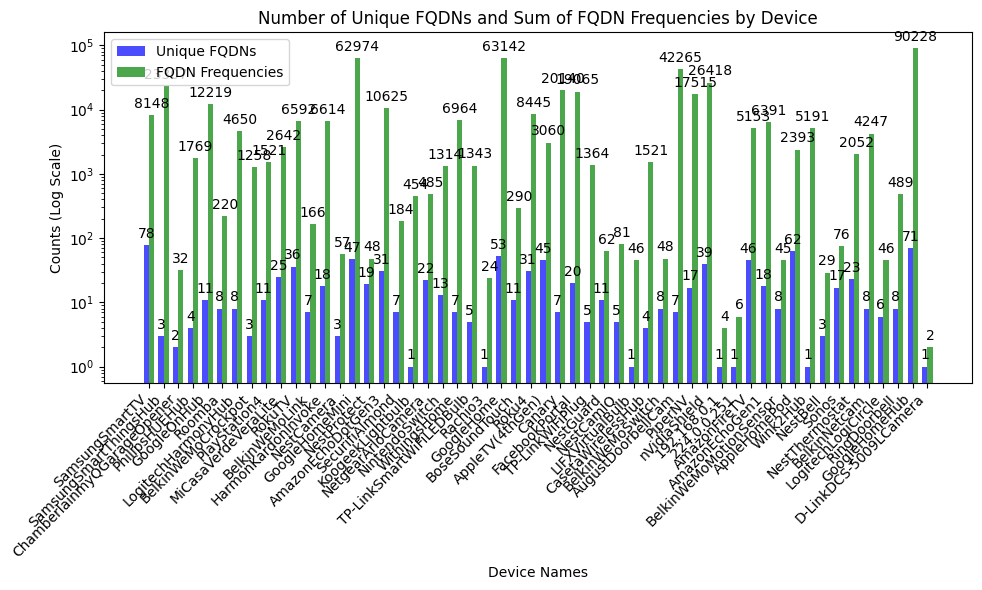

In [2]:
from IPython.display import Image
Image(filename="./grouped_bar_chart.png")

#### References:

[1] IoTFinder: Efficient Large-Scale Identification of IoT Devices via Passive DNS Traffic Analysis

[2] Classifying IoT Devices in Smart Environments Using Network Traffic Characteristics

[3] Deep Learning-Based Security Behaviour Analysis in IoT Environments: A Survey

[4] https://www.electropages.com/blog/2023/05/unpatched-iot-security-vulnerability-case-wemo-smart-plugs